# K-Nearest Neighbors - PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier #Import scikit-Tree For Decision Tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix #import Confusion Matrix
from sklearn.model_selection import train_test_split # Splitting the data
from sklearn import preprocessing # Normalizing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import time


D:\Users\sourc\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df_o = pd.read_csv("../data/processed/data_allcolumns.csv",index_col=0)

In [3]:
# Normalizing the data
x = df_o.values #returns a numpy array
col = df_o.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_n = pd.DataFrame(x_scaled, columns = col)

# df_n

In [4]:
# Separate majority and minority classes
df_majority = df_o[df_o['isFirstDown']==0]
df_minority = df_o[df_o['isFirstDown']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,                  # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123)              # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['isFirstDown'].value_counts()

1    22532
0    22532
Name: isFirstDown, dtype: int64

In [5]:
X = df_o.drop("isFirstDown",1)   #Feature Matrix
y = df_o["isFirstDown"]          #Target Variable

In [6]:
# from sklearn.model_selection import train_test_split # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=72)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19957, 33)
(8554, 33)
(19957,)
(8554,)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 18) # Where to change the number of PCA variables
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [9]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print (np.count_nonzero(explained_variance))

[0.0817825  0.07209724 0.06651051 0.0641181  0.05513961 0.0518067
 0.04622862 0.04252297 0.0372547  0.03433249 0.03375346 0.03217635
 0.031636   0.03080011 0.02904403 0.02817466 0.02756884 0.02716569]
18


In [10]:
for i in range(0,np.count_nonzero(explained_variance + 1)):
    print(i," ", sum(explained_variance[0:i]))

0   0
1   0.08178249642578789
2   0.15387974024808126
3   0.2203902497798973
4   0.2845083514354269
5   0.3396479657104926
6   0.39145466895842773
7   0.43768329084948365
8   0.4802062590508886
9   0.5174609580452985
10   0.5517934474165613
11   0.585546908821504
12   0.6177232538861077
13   0.6493592494105312
14   0.6801593567479971
15   0.7092033861888595
16   0.7373780494404518
17   0.7649468923297841


In [11]:
# Fitting Logistic Regression to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
accText = 'K-Nearest, PCA'

In [14]:
# Model Accuracy, how often is the classifier correct?

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

acc = pd.read_csv("../data/external/accuracies.csv", index_col=0)
acc.at[accText, 'Accuracy'] = (accuracy)
acc.at[accText, 'Precision'] = (precision)
acc.at[accText, 'Recall'] = (recall)
acc.at[accText, 'F1'] = (f1)
acc.at[accText, 'ROC'] = (roc_auc)
acc.to_csv("../data/external/accuracies.csv")

  Accuracy: 81.14%
 Precision: 57.69%
    Recall: 32.29%
  F1 score: 41.41%
 ROC score: 63.07%


In [15]:
#Present Confusion Matrix to show accuracy
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred, labels=[1,0]))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:

[[ 570 1195]
 [ 418 6371]]

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6789
           1       0.58      0.32      0.41      1765

    accuracy                           0.81      8554
   macro avg       0.71      0.63      0.65      8554
weighted avg       0.79      0.81      0.79      8554



In [16]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap


In [17]:
knnvals={}
for i in range(1,34):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knnvals[i]=accuracy
    
dfknn = pd.DataFrame.from_dict(knnvals, orient="index", columns=['acc'])
dfknn

,acc
1,0.740940
2,0.795417
3,0.784311
4,0.799743
5,0.799743
6,0.807108
7,0.807108
8,0.807692
9,0.811433
10,0.812485


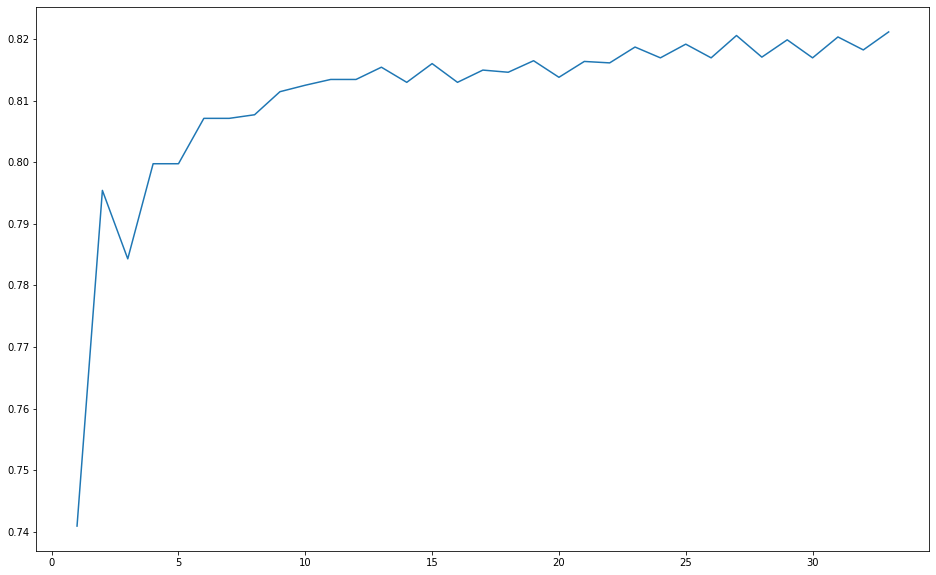

In [18]:
plt.figure(figsize=(16, 10))
plt.plot(dfknn, scalex=range(1,34))
